# Final: saving all HMM data, of which the states timecourses.

## The libraries and methods we need:

In [1]:
import numpy as np
from loader import load_oneIC

In [2]:
import pickle

In [3]:
import matplotlib.pyplot as plt

In [4]:
import h5py

In [5]:
import xarray as xr

In [6]:
directory = "E:/timot/Documents/1 - Centrale Marseille/0.5 - Semestre S8/Stage/NIC_250819"
file = "FCK_LOCKED_IC_JYOTIKA_250819.mat"

path = f"{directory}/{file}"

mat_file = h5py.File(path, "r")
cells_refs = mat_file['FCK_LOCKED_IC_JYOTIKA']

n_IC = 4
n_subj = 23

## The routine:

In [7]:
lags = np.arange(-29, 29)
n_lags = lags.shape[0]
n_iter=100
n_states=3    # for the Hidden Markov Model
n_components=40     # For the principal component analysis
covariance_type='diag'
model_type='GMMHMM'
tol=0.01
n_mix=1

origin_dir = "tde-hmm2/19.06 nc_files/"
target_dir = "tde-hmm2/nc_files/"

In [90]:
ds = xr.open_dataset(f"tde-hmm2/nc_files/su2-3states_data.nc")

In [92]:
frac = ds["states_timecourse"].sum("trials")

In [98]:
t_axis = ds["time"]

In [97]:
frac.dims

('IC', 'time', 'states')

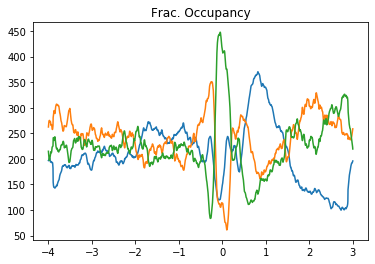

In [102]:
plt.figure()
plt.title('Frac. Occupancy')
plt.plot(t_axis, frac.values[0,])